<a href="https://colab.research.google.com/github/Nishidh25/Deeplearning-Models/blob/master/iris_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Author : [Nishidh Singh Shekhawat](https://github.com/Nishidh25)

4 July 2020


# Classify iris plants into three species in this classic dataset

# About Data
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-07-04 05:55:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-07-04 05:55:45 (39.0 MB/s) - ‘iris.data.1’ saved [4551/4551]



In [2]:
import pandas as pd 
df = pd.read_csv("iris.data",header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm",	"PetalWidthCm",	"Species"]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 5)

# Data Visualisation

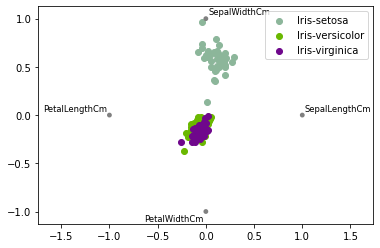

In [9]:
# radviz plot
from pandas.plotting import radviz
radviz(df, "Species")

# Pre-proceessing data

In [10]:
# Species Text to labels
from sklearn.preprocessing import LabelEncoder

lenc=LabelEncoder()
df['Species']=lenc.fit_transform(df['Species'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
X=df.iloc[:,:-1]
y=df['Species']

In [12]:
# 80-20 train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2)

# Scaling 

Standard Scaler Z  = x- mu / sigma

In [13]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Model Fitting



## Model 1
Linear Model , Simple Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)

In [16]:
score

0.9333333333333333

## Model 2 
Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=20,learning_rate=0.1,max_depth=2)
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
from sklearn import metrics
import numpy as np 

y_pred=model_gb.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)
print('RMS err', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))

0.9666666666666667
RMS err 0.18


# Results
* Linear Model - 93% Accuracy 
* Gradient Boosting - 96% Accuracy 0.18 MSE